In [1]:
push!(LOAD_PATH, pwd())
using LightGraphs, IndirectRec, GraphConnectivityTheory,GraphCreation
using PyCall, PyPlot, Distributions
@pyimport seaborn as sns

# Average critical threshold

In [ ]:
N = 100
p = 0.2
graph_type_range = [:erdos_renyi,:watts_strogatz,:powerlaw_cluster]
k_ideal_range = collect(5:5:40)
p_know_range = zeros((length(k_ideal_range),length(graph_type_range)))
p_know_range_th = similar(p_know_range)
p_know_range_perc = similar(p_know_range)
k_range = similar(p_know_range)
p_known_fn = (x,y) -> get_p_known_first_order(x,y,p)
for (j,graph_type) in enumerate(graph_type_range)
    for (i,k) in enumerate(k_ideal_range)
        g = create_graph(N,k,graph_type)
        k_range[i,j] = 2*LightGraphs.ne(g)/LightGraphs.nv(g)
        p_know_range[i,j] = get_mean_p_known_on_node_for_graph(g, p_known_fn)
        p_know_range_th[i,j] = get_p_known_first_order_theory(g, p)
        p_know_range_perc[i,j] = get_p_known_percolation(g,p)[end]
    end
end

In [ ]:
using PyPlot
colors_arr = ["b","r","g"]
linestyle_arr = ["-o","-^","-s"]
for (j,graph_type) in enumerate(graph_type_range)
    plot(k_range[:,j],1./p_know_range[:,j],linestyle_arr[j],color=colors_arr[j])
    plot(k_range[:,j],1./p_know_range_th[:,j],color=colors_arr[j],linestyle="--")
    plot(k_range[:,j],1./p_know_range_perc[:,j],color=colors_arr[j],linestyle="-")
end
ylabel(L"$\left(\frac{b}{c}\right)^*$",size=20)
xlabel(L"$k$",size=20)
grid()


# Higher Order Gossip and Percolation Theory

We can give a theoretical description of the average value of $p_{known}$ for a node on an erdos-renyi random graph. Each edge exists with probility $p_{edge} = \frac{k}{N-1}$. Now, we sample each edge existing with probability $p$. Thus in the sample, each edges exists with probability $$p \frac{k}{N-1}$$. The percolation probability on this graph is
$$P_{percolate,gnp}(N,p p_{edge})$$

This percolation probability is made up of two distinct events. The event where two randomly picked nodes are connected by a direct edge, and the event where those two nodes are not connected by a direct edge, but instead by some longer path. We can thus write

$$P_{percolate,gnp}(N,p p_{edge}) = p p_{edge} + (1 - p p_{edge}) p_{longer path}$$
or
$$p_{longer path} = \frac{P_{percolate,gnp}(N,p p_{edge}) - p p_{edge}}{1 - p p_{edge}}$$

Now, we are picking only edges that already exist in the graph before, so the probability that the two nodes are connected by a direct edge is $p$ and not $p p_{edge}$. Thus, we obtain
$$p_{known} = p + (1-p) p_{longer path} = p + (1-p) \frac{P_{percolate,gnp}(N,p p_{edge}) - p p_{edge}}{1 - p p_{edge}} $$

$P_{percolate}$ is given by the 2 terminal reliability function.


## Plotting theory calculations of p_known

In [ ]:
p_range = 0.0:0.05:1.0
n_range = 0:1:20
num_trials = 1000
# p_known_th_arr = [get_p_known_nth_order_theory(g,p,n) for n in n_range, p in p_range]
# p_known_perc_arr = [get_p_known_percolation(g,p,num_trials)[end] for p in p_range]
# p_known_perc_th_arr = [get_p_known_percolation_theory(g,p) for p in p_range]
# p_known_perc_cutoff_arr = [get_p_known_percolation(g,p,n,num_trials)[end] for n in n_range, p in p_range]

# surf(p_range,n_range,p_known_th_arr,cstride=1,rstride=1)
# gca()[:view_init](elev=30,azim=-150)
# xlabel(L"p")
# ylabel(L"order")
# figure()
plot(p_range,p_known_th_arr[1,:]',label="paths theory 1","-.")
plot(p_range,p_known_th_arr[2,:]',label="paths theory 2","-.")
for n in [1,2,3,6,10,20]
    plot(p_range,p_known_perc_cutoff_arr[n,:]',label="percolation MC, order $(n-1)","--")
end

plot(p_range,p_known_perc_arr,label="percolation MC")
plot(p_range,p_known_perc_th_arr,label="reliability theory")

#plot(p_range,p_range)
legend(loc = "lower right")

In [7]:
N = 100
p = 0.05
num_trials = 50
graph_type_range = [:erdos_renyi,:watts_strogatz,:powerlaw_cluster]
graph_name_range = ["erdos renyi", "watts strogatz", "powerlaw cluster"]
n_range = [1,2,3,5,7,100]
k_ideal_range = collect(2:2:48)
p_know_range_th = zeros((length(k_ideal_range),length(graph_type_range)))
p_know_range = similar(p_know_range_th)
p_know_range_th2 = similar(p_know_range_th)
p_know_range_perc_th = similar(p_know_range_th)
p_know_range_perc_order = zeros((length(k_ideal_range),length(graph_type_range),length(n_range)))
k_range = similar(p_know_range_th)
p_known_fn = (x,y) -> get_p_known_first_order(x,y,p)
for (j,graph_type) in enumerate(graph_type_range)
    for (i,k) in enumerate(k_ideal_range)
        g = create_graph(N,k,graph_type)
        k_range[i,j] = 2*LightGraphs.ne(g)/LightGraphs.nv(g)
#         p_know_range[i,j] = get_mean_p_known_on_node_for_graph(g, p_known_fn)
#         p_know_range_th[i,j] = get_p_known_first_order_theory(g, p)
#         p_know_range_th2[i,j] = get_p_known_second_order_theory(g, p)
        p_know_range_perc_th[i,j] = get_p_known_percolation_theory(g,p)
        for (l,n) in enumerate(n_range)
            p_know_range_perc_order[i,j,l] = get_p_known_percolation(g,p,n,num_trials)[end]
        end
    end
end


Use "Dict{Any,Any}(a=>b, ...)" instead.


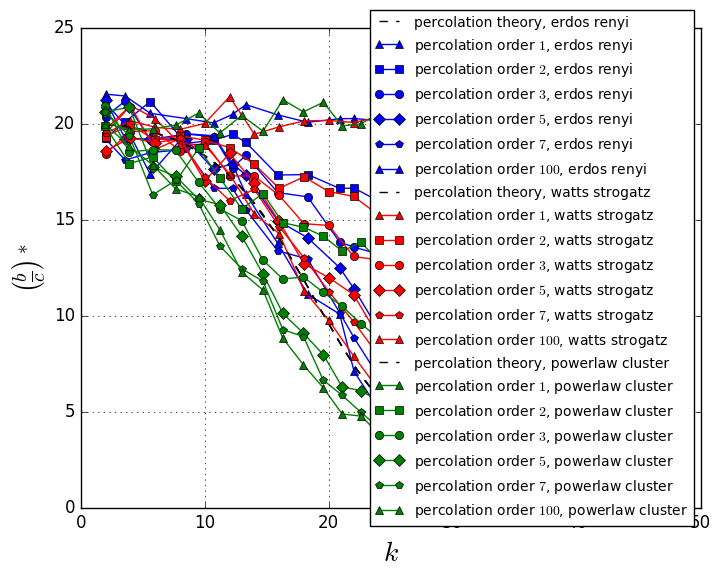

In [9]:
graph_name_range = ["erdos renyi", "watts strogatz", "powerlaw cluster"]
colors_arr = ["b","r","g"]
linestyle_arr = ["-p","-^","-s","-o","-D"]
for (j,graph_type) in enumerate(graph_type_range)
    #figure(j)
    plot(k_range[:,j],1./p_know_range_perc_th[:,j],"--",color="k",label="percolation theory, $(graph_name_range[j])")
    for (l,n) in enumerate(n_range[1:end])
    #plot(k_range[:,j],1./p_know_range[:,j],linestyle_arr[j],color=colors_arr[j],linestyle=linestyle_arr[j])
    #plot(k_range[:,j],1./p_know_range_th[:,j],linestyle_arr[j],color=colors_arr[j])
        if true#j == 1 || l == 1
            label = latexstring("percolation order \$$n\$, $(graph_name_range[j])")
        else
            label = ""
        end
        plot(k_range[:,j],1./p_know_range_perc_order[:,j,l],linestyle_arr[1 + (l % length(linestyle_arr))],color=colors_arr[j],label=label)
    end
    ylabel(L"$\left(\frac{b}{c}\right)^*$",size=20)
    xlabel(L"$k$",size=20)
    grid()
    legend(prop={"size"=>10},loc="center right")
    savefig("../figures/b_c_critical_vs_k_p0.2_N100_percolation_orders_$(graph_name_range[j]).png")
end



## Monte Carlo calculation of p_known

In [ ]:
N = 50
p_edge = 0.2
p = 0.1
num_trials = 10
println(get_p_known_percolation_erdos_renyi(N,p_edge,p,num_trials))
println(get_p_known_percolation_theory(N,p_edge,p))

In [ ]:
N = 50
p_edge = 0.9
p = 0.90

num_trials = 10


p_edge_range = collect(0:0.1:1)
p_range = collect(0:0.1:1)

p_known_perc_exp_arr = zeros((length(p_edge_range),length(p_range)))
p_known_perc_th_arr = similar(p_known_perc_exp_arr)

for (i,p) in enumerate(p_range)
    for (j,p_edge) in enumerate(p_edge_range)
        p_known_perc_exp_arr[j,i] = get_p_known_percolation_erdos_renyi(N,p_edge,p,num_trials)
        p_known_perc_th_arr[j,i] = get_p_known_percolation_theory(N,p_edge,p)
    end
end
        
#println(get_p_known_percolation_erdos_renyi(N,p_edge,p,num_trials))

#println(get_p_known_percolation_theory(N,p_edge,p))
#@time println(get_mean_p_known_on_node_for_graph(gg,(x,y) -> get_p_known_percolation(x,y,p,num_trials)))


In [ ]:
figure()
surf(p_edge_range,p_range,(p_known_perc_exp_arr-p_known_perc_th_arr)./p_known_perc_exp_arr,cstride=1,rstride=1,alpha=0.4,color="r")
surf(p_edge_range,p_range,p_known_perc_th_arr,cstride=1,rstride=1,alpha=0.4)
gca()[:view_init](elev=30,azim=210)
xlabel(L"$p_{edge}$")
ylabel(L"$p$")


In [ ]:
function get_p_known_percolation_erdos_renyi(N,p_edge,p,num_trials)
    graph_trials = 100
    p_known = 0
    for i = 1:graph_trials
        g = LightGraphs.erdos_renyi(N,p_edge)
        p_known += get_p_known_percolation(g,p,num_trials)[end]
    end
    return p_known / graph_trials
end

# Plotting of distribution over nodes

In [ ]:
unshift!(PyVector(pyimport("sys")["path"]), "")
@pyimport graph_reciprocity as gr
@pyimport networkx as nx

In [ ]:
gr.plot_histograms(all_thresholds,p)
plot_colored_graphs(graph_fns,all_graphs,all_thresholds,all_degrees,graph_names,p)

In [3]:
using JLD

##facebook: N = 4040, k = 44
N = 1000
p = 0.4
num_trials = 100
num_trials_perc = 200
graph_type_range = [:erdos_renyi,:watts_strogatz,:powerlaw_cluster,:fb]
graph_name_range = ["erdos renyi", "watts strogatz", "powerlaw cluster", "facebook"]
n_range = [2,7] 
k = 7

#histogram data
hist_all_degrees = Array(Array{Any,1},(length(n_range),length(graph_type_range)))
hist_all_thresholds = Array(Array{Any,1},(length(n_range),length(graph_type_range)))
hist_all_clustering= Array(Array{Any,1},(length(n_range),length(graph_type_range)))
for (i,n) in enumerate(n_range)
    for (j,graph_type) in enumerate(graph_type_range)
        num_trials_curr = graph_type == :fb ? 1 : num_trials
        hist_all_thresholds[i,j] = Any[]
        hist_all_degrees[i,j] = Any[]
        hist_all_clustering[i,j] = Any[]
        for l = 1:num_trials_curr
            g = create_graph(N,k,graph_type)
            p_knowns = get_p_known_percolation(g,p,n,num_trials_perc)[1]
    #         p_knowns = p_knowns[p_knowns .> 0.0]
            hist_all_degrees[i,j] = vcat(hist_all_degrees[i,j],LightGraphs.degree(g))
            hist_all_thresholds[i,j] = vcat(hist_all_thresholds[i,j],p_knowns)
            hist_all_clustering[i,j] = vcat(hist_all_clustering[i,j],LightGraphs.local_clustering_coefficient(g))
        end

    end
end

save("../data/per_node_data/N_$(N)_$(now).jld","hist_all_degrees",hist_all_degrees,
"hist_all_thresholds",hist_all_thresholds,"hist_all_clustering",hist_all_clustering)


LoadError: LoadError: InterruptException:
while loading In[3], in expression starting on line 17

In [2]:
using JLD
d = JLD.load("../data/per_node_data/N_4040_now.jld")
hist_all_clustering = d["hist_all_clustering"]
hist_all_degrees = d["hist_all_degrees"]
hist_all_thresholds = d["hist_all_thresholds"]
N = d["N"]
k = d["k"]
graph_name_range = d["graph_name_range"]
graph_type_range = d["graph_type_range"]
n_range = d["n_range"]
p = d["p"]

0.2

In [3]:
[mean(hist_all_degrees[2,i]) for i in 1:4]

4-element Array{Any,1}:
 43.9946
 44.0   
 43.7535
 43.691 

In [ ]:
N = 100
p = 0.4
num_trials = 10
num_trials_perc = 100
graph_type_range = [:erdos_renyi,:watts_strogatz,:powerlaw_cluster]
graph_name_range = ["erdos renyi", "watts strogatz", "powerlaw cluster"]
n = 2 #[1,5] 
k = 5
all_graphs = Array(Any,length(graph_type_range))
all_degrees = Array(Any,length(graph_type_range))
all_thresholds = Array(Array{Any,1},length(graph_type_range))
for (j,graph_type) in enumerate(graph_type_range)
    g = create_graph(N,k,graph_type)
    p_knowns = get_p_known_percolation(g,p,n,num_trials_perc)[1]

    all_graphs[j] = make_networkx_graph_from_lightgraph(g)
    all_degrees[j] = LightGraphs.degree(g)
    all_thresholds[j] = p_knowns
    #     p_knowns = p_knowns[p_knowns .> 0.0]
end

In [ ]:
gr.plot_histograms(hist_all_thresholds,p)#,N)

In [ ]:
gr.plot_colored_graphs(all_graphs,all_thresholds,all_degrees,graph_name_range,p)

In [ ]:
fig = figure()
scatter(hist_all_degrees[3],hist_all_thresholds[3])
fig[:canvas][:draw]()
show()

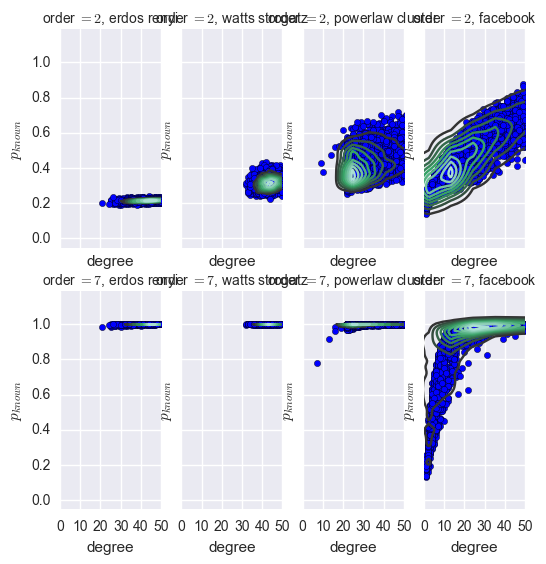

In [22]:
#PyPlot.figure()
#PyPlot.plot([1,2,3],[1,2,3])
#PyPlot.show()
f, axes = subplots(length(n_range), length(graph_type_range), figsize=(6, 6), sharex=true, sharey=true)
for (i,n) in enumerate(n_range)
    for (j,graph_type) in enumerate(graph_type_range)
        ax = axes[i,j]
        ax[:scatter](convert(Array{Float64,1},hist_all_degrees[i,j]),convert(Array{Float64,1},hist_all_thresholds[i,j]))
        sns.kdeplot(convert(Array{Float64,1},hist_all_degrees[i,j]),convert(Array{Float64,1},hist_all_thresholds[i,j]),ax=ax)

        ax[:set_xlabel]("degree")
        ax[:set_ylabel](L"$p_{known}$")
        ax[:set](xlim=(0, 50))
        ax[:set_title](latexstring("order \$= $n\$, $(graph_name_range[j])"),size=10)

    end
end
#savefig()
#show()

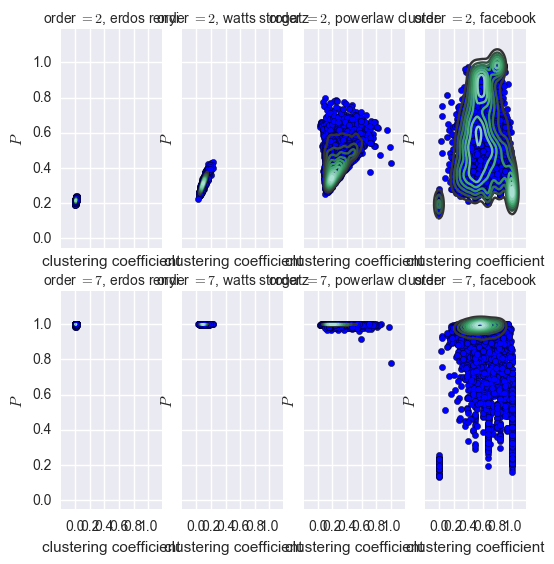

In [32]:
#PyPlot.figure()
#PyPlot.plot([1,2,3],[1,2,3])
#PyPlot.show()
f, axes = subplots(length(n_range), length(graph_type_range), figsize=(6, 6), sharex=true, sharey=true)
for (i,n) in enumerate(n_range)
    for (j,graph_type) in enumerate(graph_type_range)
        ax = axes[i,j]
        ax[:scatter](convert(Array{Float64,1},hist_all_clustering[i,j]),convert(Array{Float64,1},hist_all_thresholds[i,j]))
        sns.kdeplot(convert(Array{Float64,1},hist_all_clustering[i,j]),convert(Array{Float64,1},hist_all_thresholds[i,j]),ax=ax)

        ax[:set_xlabel]("clustering coefficient")
        ax[:set_ylabel](L"$P$")
        ax[:set_title](latexstring("order \$= $n\$, $(graph_name_range[j])"),size=10)
    end
end

#show()

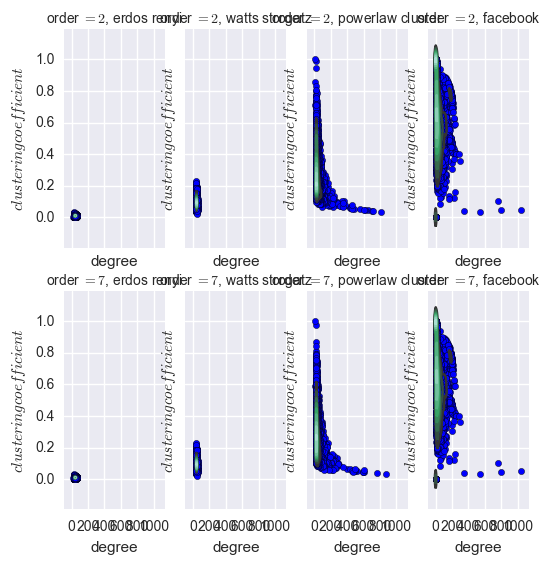

In [34]:
f, axes = subplots(length(n_range), length(graph_type_range), figsize=(6, 6), sharex=true, sharey=true)
for (i,n) in enumerate(n_range)
    for (j,graph_type) in enumerate(graph_type_range)
        ax = axes[i,j]
        ax[:scatter](convert(Array{Float64,1},hist_all_degrees[i,j]),convert(Array{Float64,1},hist_all_clustering[i,j]))
        sns.kdeplot(convert(Array{Float64,1},hist_all_degrees[i,j]),convert(Array{Float64,1},hist_all_clustering[i,j]),ax=ax)

        ax[:set_xlabel]("degree")
        ax[:set_ylabel](L"$clustering coefficient$")
        ax[:set_title](latexstring("order \$= $n\$, $(graph_name_range[j])"),size=10)
    end
end


In [ ]:
cs = pyimport("matplotlib.colors")


for j = 1:length(n_range)
    for i = 1:length(graph_type_range)
        alpha = i < 4 ? 0.15 : 0.25
        gg = sns.jointplot(convert(Array{Float64,1},hist_all_degrees[j,i]),convert(Array{Float64,1},hist_all_thresholds[j,i]),kind="kdeplot")
        gg[:ax_joint][:hold](1)
        ps = gg[:ax_joint][:scatter](hist_all_degrees[j,i],hist_all_thresholds[j,i],cmap=ColorMap("hsv"),c = hist_all_clustering[j,i],vmin=0,vmax=250,alpha=alpha)
        gg[:ax_joint][:patch][:set_visible](false)
        colorbar(ps)
        gg[:ax_joint][:set_xlabel]("degree")
        gg[:ax_joint][:set_ylabel](L"P")
        gg[:ax_joint][:set_title]("n = $(n_range[j]), $(graph_name_range[i])")
        #savefig("../figures/degree_p_known_correlation_order5_powerlaw_cluster")
        savefig("../figures/degree_p_known_correlation_order_$(n_range[j])_$(graph_name_range[i]).png")
    end
end

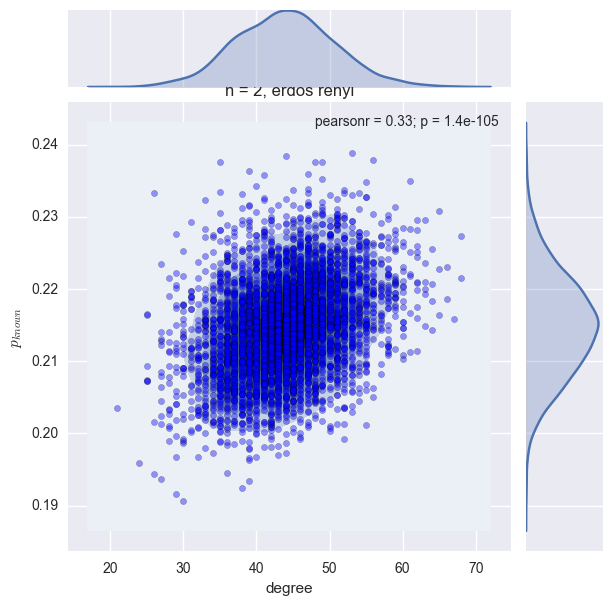

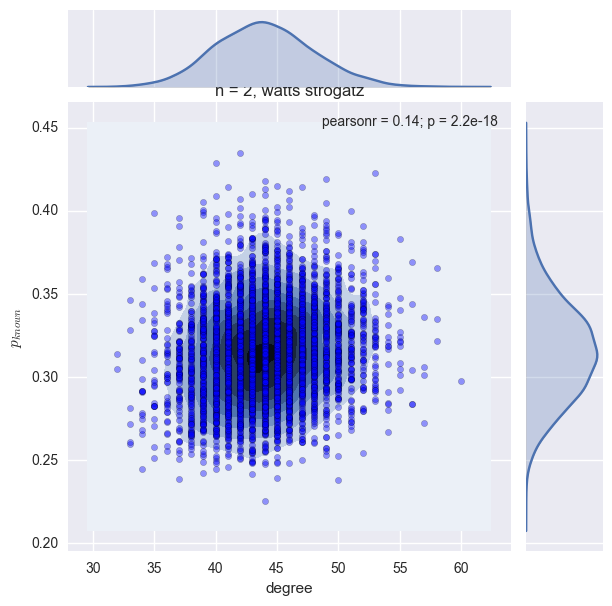

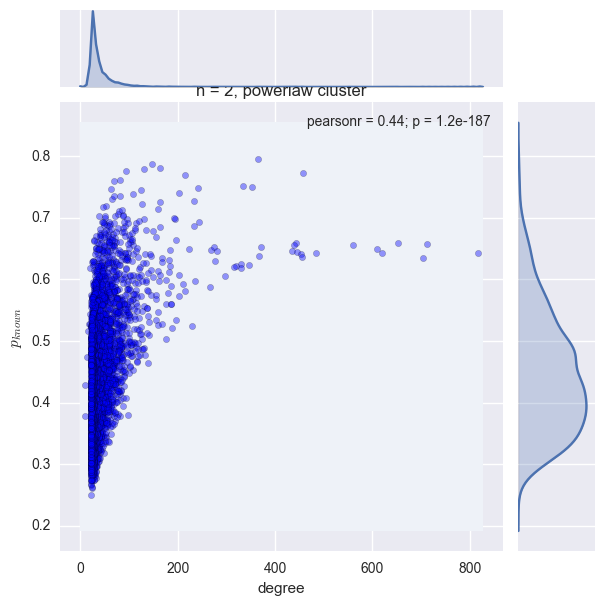

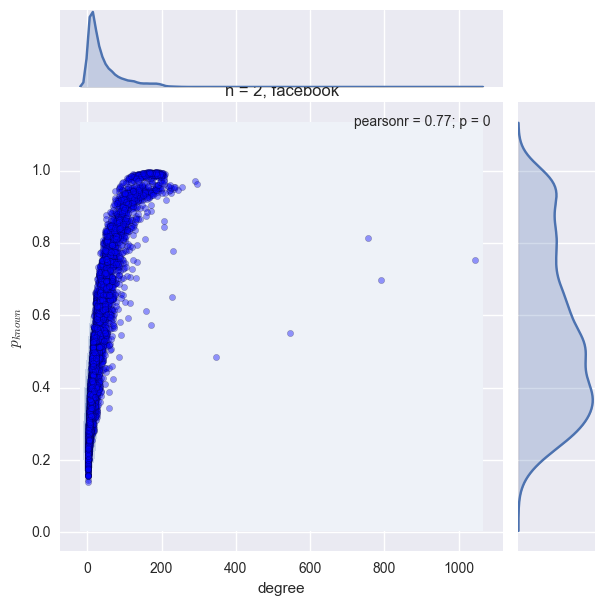

In [39]:
j = 1
for i = 1:length(graph_type_range)

    gg = sns.jointplot(convert(Array{Float64,1},hist_all_degrees[j,i]),convert(Array{Float64,1},hist_all_thresholds[j,i]),kind="kdeplot")
    gg[:ax_joint][:hold](1)
    gg[:ax_joint][:scatter](hist_all_degrees[j,i],hist_all_thresholds[j,i],alpha=0.4)
    gg[:ax_joint][:set_xlabel]("degree")
    gg[:ax_joint][:set_ylabel](L"p_{known}")
    gg[:ax_joint][:set_title]("n = $(n_range[j]), $(graph_name_range[i])")
    #savefig("../figures/degree_p_known_correlation_order5_powerlaw_cluster")
end

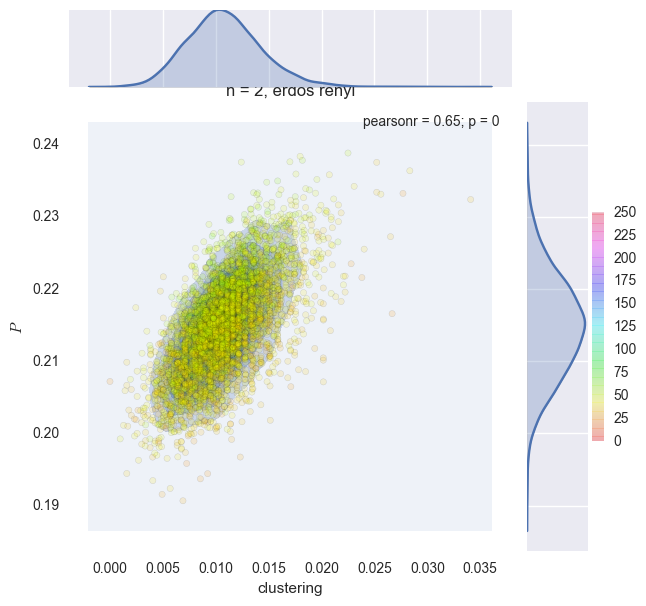

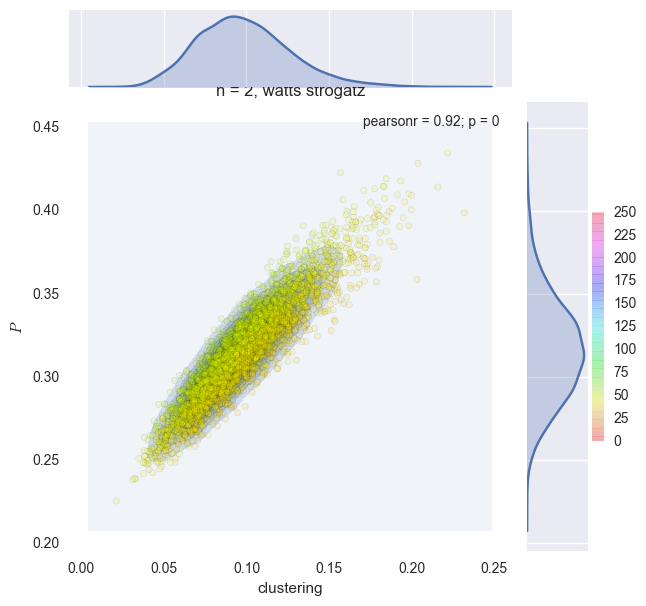

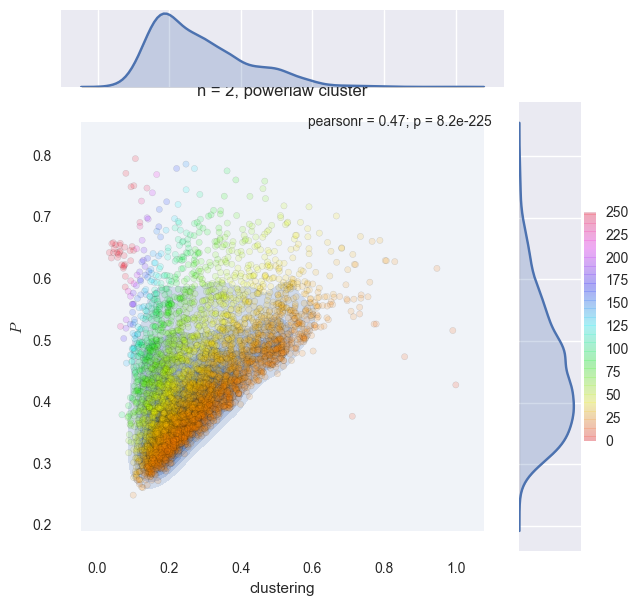

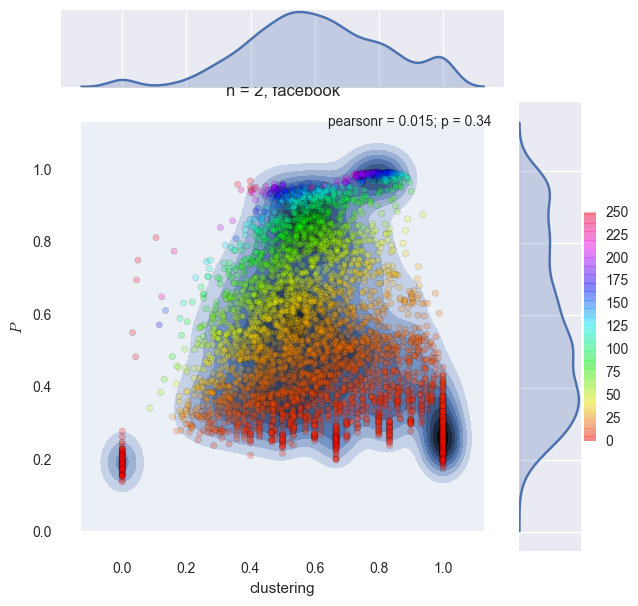

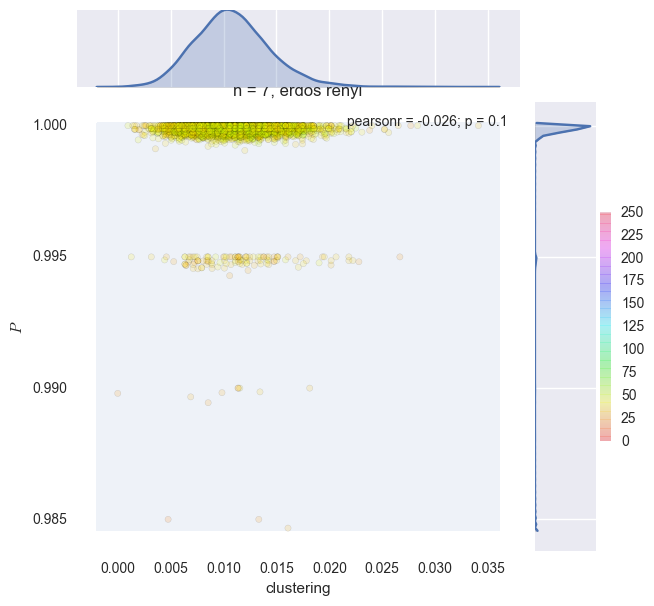

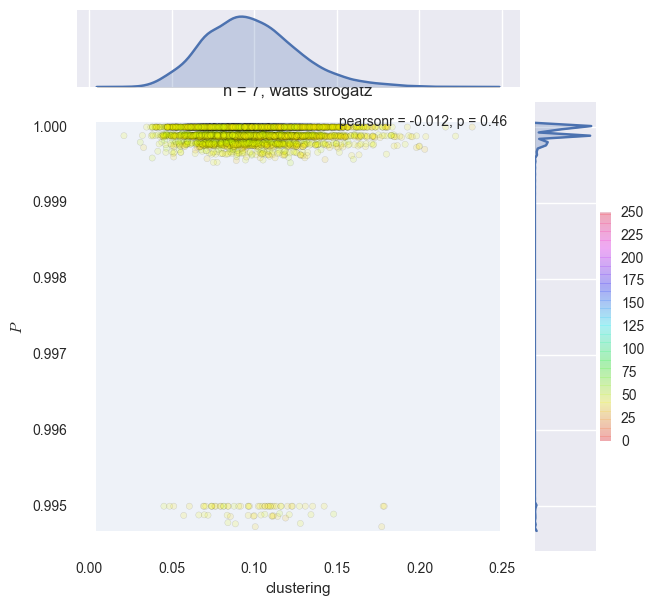

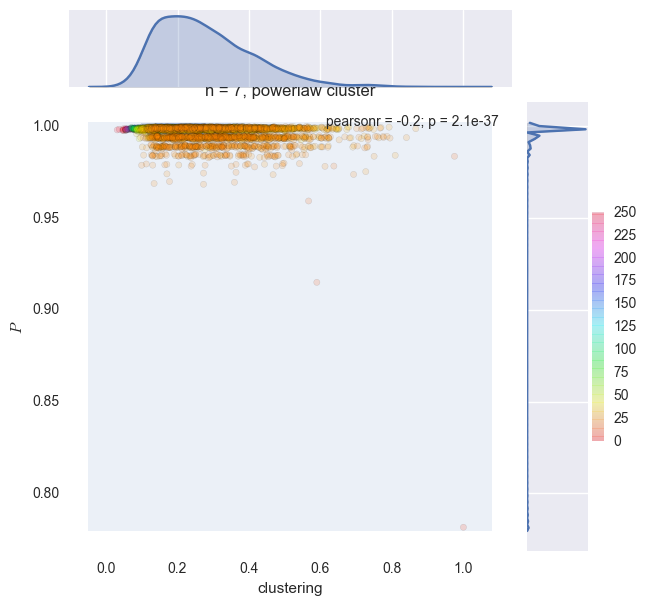

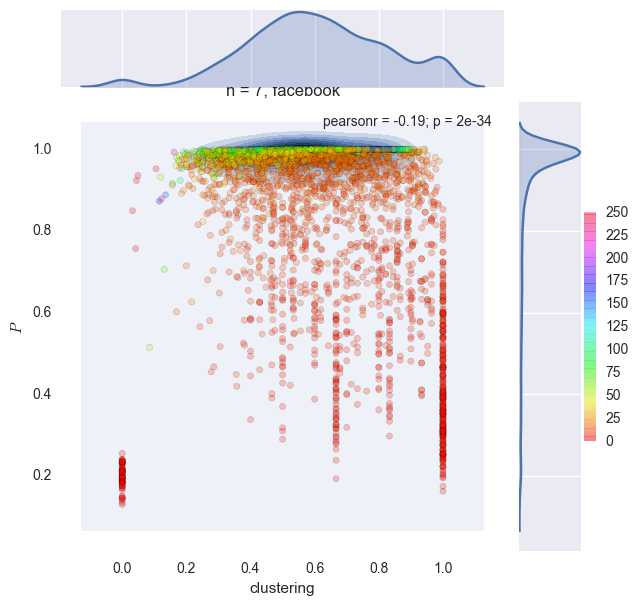

In [5]:
cs = pyimport("matplotlib.colors")


for j = 1:length(n_range)
    for i = 1:length(graph_type_range)
        alpha = i < 4 ? 0.15 : 0.25
        gg = sns.jointplot(convert(Array{Float64,1},hist_all_clustering[j,i]),convert(Array{Float64,1},hist_all_thresholds[j,i]),kind="kdeplot")
        gg[:ax_joint][:hold](1)
        ps = gg[:ax_joint][:scatter](hist_all_clustering[j,i],hist_all_thresholds[j,i],cmap=ColorMap("hsv"),c = hist_all_degrees[j,i],vmin=0,vmax=250,alpha=alpha)
        gg[:ax_joint][:patch][:set_visible](false)
        colorbar(ps)
        gg[:ax_joint][:set_xlabel]("clustering")
        gg[:ax_joint][:set_ylabel](L"P")
        gg[:ax_joint][:set_title]("n = $(n_range[j]), $(graph_name_range[i])")
        #savefig("../figures/degree_p_known_correlation_order5_powerlaw_cluster")
        savefig("../figures/clustering_p_known_correlation_order_$(n_range[j])_$(graph_name_range[i]).png")
    end
end

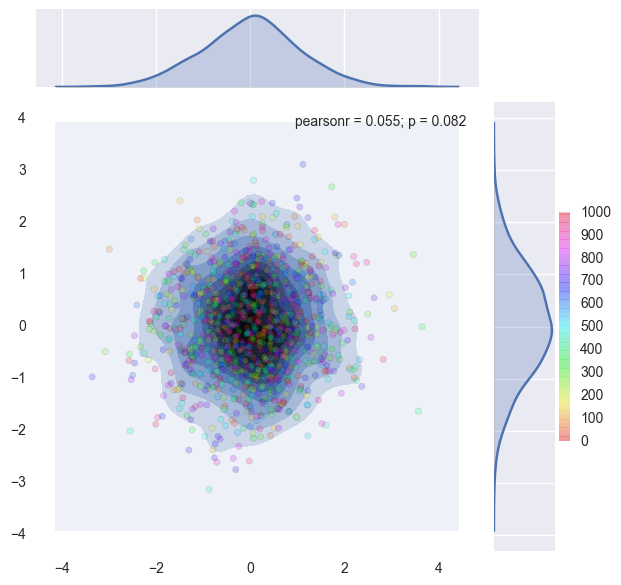

PyObject <matplotlib.colorbar.Colorbar object at 0x32c9512d0>

In [14]:
tx = randn(1000)
ty = randn(1000)
gg = sns.jointplot(tx,ty,kind="kdeplot")
ps = gg[:ax_joint][:scatter](tx,ty,cmap=ColorMap("hsv"),c = collect(1:1000),vmin=0,vmax=1000,alpha=0.2)
gg[:ax_joint][:patch][:set_visible](false)
#gg[:ax_joint][:set_axis_bgcolor]((0,0,0))
colorbar(ps)

In [16]:
cs = pyimport("matplotlib.colors")
pycall(cs["Normalize"],PyAny,0,1)

PyObject <matplotlib.colors.Normalize object at 0x3299f39d0>

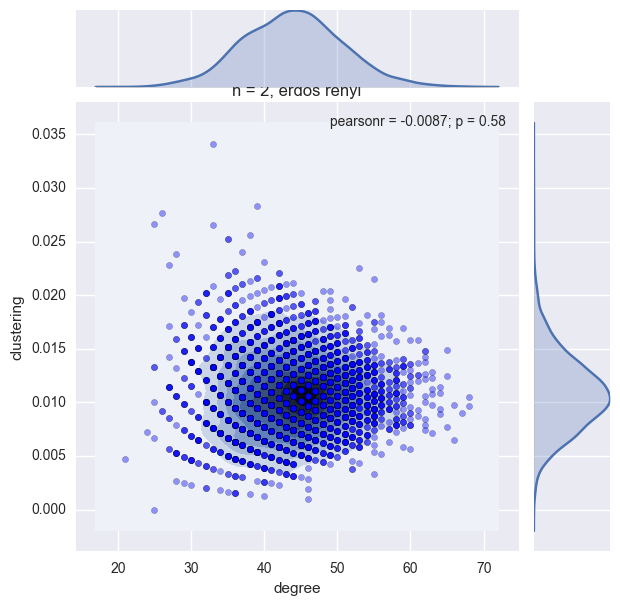

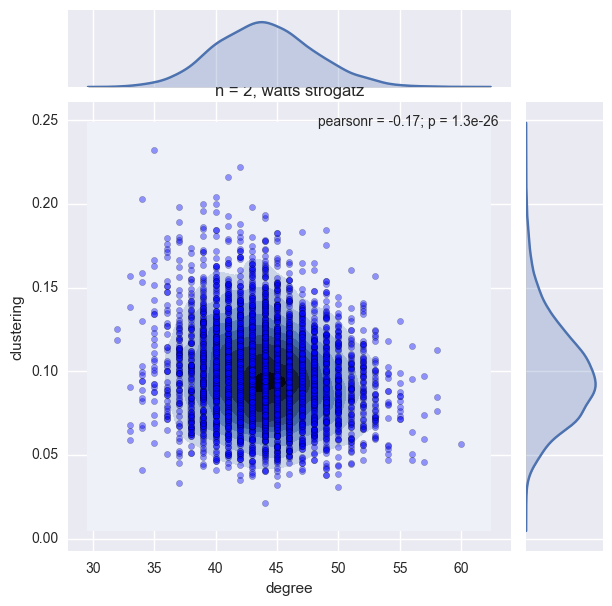

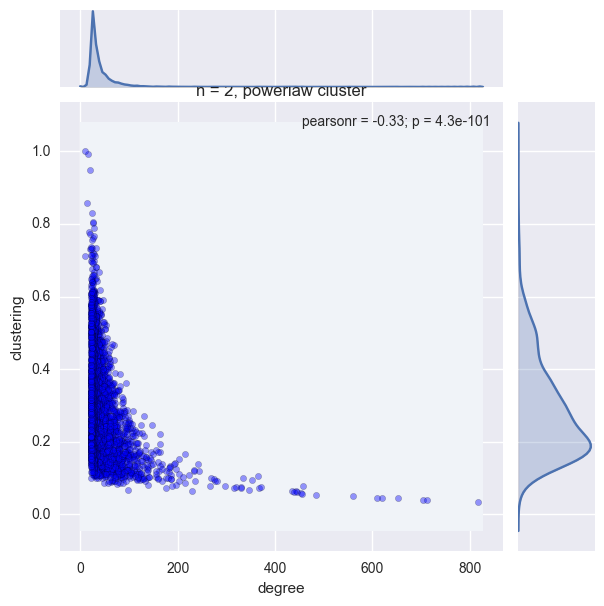

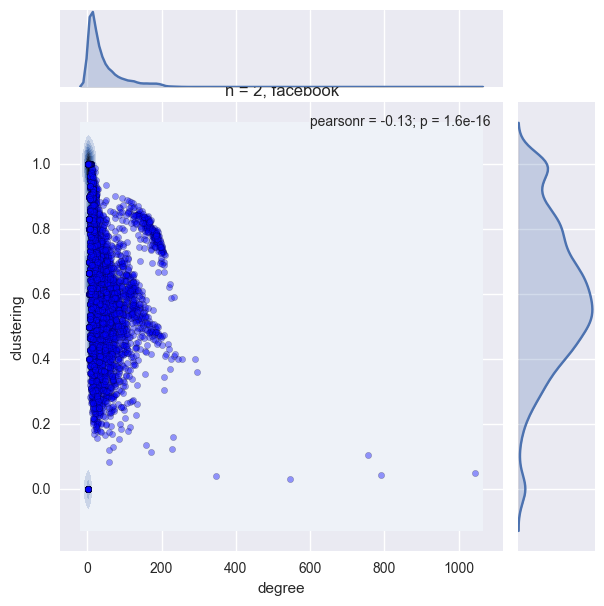

In [5]:
cs = pyimport("matplotlib.colors")
j = 1
for i = 1:length(graph_type_range)

    gg = sns.jointplot(convert(Array{Float64,1},hist_all_degrees[j,i]),convert(Array{Float64,1},hist_all_clustering[j,i]),kind="kdeplot")
    gg[:ax_joint][:hold](1)
    gg[:ax_joint][:scatter](hist_all_degrees[j,i],hist_all_clustering[j,i],alpha=0.4)
    gg[:ax_joint][:set_xlabel]("degree")
    gg[:ax_joint][:set_ylabel]("clustering")
    gg[:ax_joint][:set_title]("n = $(n_range[j]), $(graph_name_range[i])")
    #savefig("../figures/degree_p_known_correlation_order5_powerlaw_cluster")
end

In [ ]:
@time p_knowns = get_p_known_percolation(g,0.4,2,1)[1]

In [ ]:
gg = sns.jointplot(convert(Array{Float64,1},hist_all_clustering[2,2]),convert(Array{Float64,1},hist_all_thresholds[2,2]),kind="kdeplot")
gg[:ax_joint][:hold](1)
gg[:ax_joint][:scatter](hist_all_clustering[2,2],hist_all_thresholds[2,2])
gg[:ax_joint][:set_xlabel]("degree")
gg[:ax_joint][:set_ylabel](L"p_{known}")
savefig("../figures/clustering_p_known_correlation")

In [ ]:

sns.jointplot(randn(10000),randn(10000))

In [ ]:
#set_backend("TkAgg")
#show()
plt[:plot]([1,2,3],[1,2,3])
plt[:show]()

# Speed Test

In [ ]:



N = 500
p_edge = 0.1
#g = LightGraphs.erdos_renyi(N,p_edge)
g = powerlaw_cluster_graph(N,Int(round((N-1)*p_edge)),0.5)
#g = LightGraphs.random_regular_graph(N,Int(round((N-1)*p_edge)))
#g = LightGraphs.watts_strogatz(N,Int(round((N-1)*p_edge)),0.1)
p = 0.2
@show get_mean_p_known_on_edge_for_graph(g,(x,y) -> get_p_known_first_order(x,y,p))
@show get_mean_p_known_on_node_for_graph(g, (x,y) -> get_p_known_first_order(x,y,p))

In [ ]:
function ave(p_known_fn)
    N = 1000
    p_edge = 0.1
    g = LightGraphs.erdos_renyi(N,p_edge)
    p_known = 0
    for v in LightGraphs.vertices(g)
        p_known += get_mean_p_known_for_node(g,v, (x,y) -> p_known_fn(x,y,p))
    end
    p_known /= length(LightGraphs.vertices(g))
end

In [ ]:
#Profile.clear()
@time ave(get_p_known_first_order)
@time ave(get_p_known_zeroth_order)


In [ ]:
Profile.print()

In [ ]:

@less mapreduce_sc_impl(1)

In [ ]:
N = 400
a = Array(1:N)
b = Array(1+N:2*N)
#intersection_length(a,b) == length(intersect(a,b))
#@time length(intersect(a,a))
@time intersection_length(a,b)
@time intersection_length_it(a,b)

## TODO


### Sample real world graphs using a graph generator for arbitrary degree distributions.

### make figure of different order $P$, one figure for each graph type.

### Perform the analysis for the real world graph as the final figure of the paper.

## Key Points

- The percolation theory calculation matches the monte carlo calculation
- for short-lived gossip (low transmission length, small p), the structure matters, otherwise it doesn't much
- social graphs (clustering, small world) increase $p_known$ and thus cooperation
- Nodes with high local clustering people with tight-knit groups have high incentive to cooperate
- Nodes with high connectivity (people with many friends) have high incentive to cooperate

In [ ]:
#function intersection_length(a::Array{Int,1},b::Array{Int,1})
#     l = 0
#     b = sort(b)
#     for v in a
#         l += length(searchsorted(b,v))
#     end
#     l
# end

# function get_p_known_first_order(g::LightGraphs.Graph,e::Pair{Int,Int},p::Real)
#     return get_p_known_first_order(get_num_mutual_neighbors(g,e),p)
# end

# function get_p_known_first_order_theory(g::LightGraphs.Graph,p::Real)
#     return get_p_known_first_order(get_num_mutual_neighbors_theory(g),p)
# end

# function get_num_mutual_neighbors(g::LightGraphs.Graph,e::Pair{Int,Int})
#     v1 = e[1]
#     v2 = e[2]
#     neighbors1 = LightGraphs.neighbors(g,v1)
#     neighbors2 = LightGraphs.neighbors(g,v2)
#     num_mutual_neighbors = intersection_length(neighbors1,neighbors2)
#     return num_mutual_neighbors
# end

# function get_num_mutual_neighbors_theory(g::LightGraphs.Graph)
#     num_vertices= LightGraphs.nv(g)
#     p_edge = 2*LightGraphs.ne(g)/(num_vertices*(num_vertices-1))
#     num_mutual_neighbors = (num_vertices - 2)*p_edge^2
#     return num_mutual_neighbors
# end
    
# function get_p_known_first_order(num_mutual_neighbors::Real,p::Real)
#     return 1 - (1-p)*(1-p^2)^num_mutual_neighbors
# end

# function get_p_known_zeroth_order(g::LightGraphs.Graph,e::Pair{Int,Int},p::Real)
#     return p 
# end


# function get_mean_p_known_for_node(g::LightGraphs.Graph,v::Int,p_known_fn)
#     p_known = 0
#     neighbors = LightGraphs.neighbors(g,v)
#     for w in neighbors
#         p_known += p_known_fn(g,Pair(v,w))
#     end
#     return p_known/length(neighbors)
# end

# function get_mean_p_known_on_edge_for_graph(g::LightGraphs.Graph,p_known_fn)
#     p_known = 0
#     num_edges = 0
#     for v in LightGraphs.vertices(g)
#         if LightGraphs.degree(g,v) == 0 continue end
#         neighbors = LightGraphs.neighbors(g,v)
#         for w in neighbors
#             p_known += p_known_fn(g,Pair(v,w))
#             num_edges += 1
#         end
#     end
#     return p_known/num_edges
# end

# function get_mean_p_known_on_node_for_graph(g::LightGraphs.Graph,p_known_fn)
#     p_known = 0
#     num_vertices = 0
#     for v in LightGraphs.vertices(g)
#         if LightGraphs.degree(g,v) == 0 continue end
#         p_known += get_mean_p_known_for_node(g,v,p_known_fn)
#         num_vertices += 1
#     end
#     return p_known/num_vertices
# end

# ###########################Monte Carlo Calculation of p_known##########################3

# typealias GraphComponents Array{Set{Int}}

# function get_components(g::LightGraphs.Graph)
#     components::GraphComponents = []
#     for v = LightGraphs.vertices(g)
#         if !components_contain(components,v)
#             new_component = get_connected_component(g,v)
#             push!(components,new_component)
#         end
#     end
#     return components
# end

# function add_node_and_all_neighbors(g::LightGraphs.Graph,v::Int,component::Set{Int})
#     push!(component,v)
#     for w in LightGraphs.neighbors(g,v)
#         if !(w in component)
#             add_node_and_all_neighbors(g,w,component)
#         end
#     end
# end
    

# function get_connected_component(g::LightGraphs.Graph,v::Int)
#     component = Set{Int}()
#     add_node_and_all_neighbors(g,v,component)
#     return component
# end


# function components_contain(components::GraphComponents,v::Int)
#     for component in components
#         if v in component return true end
#     end
#     return false
# end


# function get_p_known_percolation(g::LightGraphs.Graph,p::Real,num_trials = 100)
#     p_knowns = zeros(size(LightGraphs.vertices(g)))
#     singletons = get_singleton_nodes_array(g)
#     for i in 1:num_trials
#         h = sample_graph_edges(g,p)
#         components = get_components(h::LightGraphs.Graph)
#         p_knowns += get_p_known_given_components(g,components)
#     end
#     p_knowns /= num_trials
#     return p_knowns,mean(p_knowns[!singletons])
# end


# #Monte Carlo Calculation of p_known
# function get_p_known_given_components(g::LightGraphs.Graph,components::GraphComponents)
#     p_knowns = zeros(size(LightGraphs.vertices(g)))
#     for v in LightGraphs.vertices(g)
#         neighbors = LightGraphs.neighbors(g,v)
#         for w in neighbors
#             if nodes_in_same_component(v,w,components) p_knowns[v] += 1.0 end
#         end
#         if length(neighbors) > 0
#             p_knowns[v] /= length(neighbors)
#         end
#     end
#     return p_knowns
# end

# #Monte Carlo Calculation of p_known with maximum path length.
# function get_p_known_given_components(g::LightGraphs.Graph,components::GraphComponents,dists::Array{Int,2},max_dist::Int)
#     p_knowns = zeros(size(LightGraphs.vertices(g)))
#     for v in LightGraphs.vertices(g)
#         neighbors = LightGraphs.neighbors(g,v)
#         for w in neighbors
#             if nodes_in_same_component(v,w,components) && dists[v,w] <= max_dist
#                 p_knowns[v] += 1.0
#             end
#         end
#         if length(neighbors) > 0
#             p_knowns[v] /= length(neighbors)
#         end
#     end
#     return p_knowns
# end


# function get_singleton_nodes_array(g::LightGraphs.Graph)
#     singletons = Array(Bool,size(LightGraphs.vertices(g)))
#     for v in LightGraphs.vertices(g)
#         if length(LightGraphs.neighbors(g,v)) == 0
#             singletons[v] = true
#         else
#             singletons[v] = false
#         end
#     end
#     return singletons
# end

# function nodes_in_same_component(v::Int,w::Int,components::GraphComponents)
#     for component in components
#         if (v in component) && (w in component)
#             return true
#         end
#     end
#     return false
# end
            
            
            
# function sample_graph_edges(g::LightGraphs.Graph,p::Real)
#     h = copy(g)
#     edges = copy(collect(LightGraphs.edges(h)))
#     for ed in edges
#         if rand() < (1-p)
#             LightGraphs.rem_edge!(h,ed)
#         end
#     end
#     return h
# end

# function get_p_known_percolation(g::LightGraphs.Graph,p::Real,max_order::Int,num_trials = 100)
#     p_knowns = zeros(size(LightGraphs.vertices(g)))
#     singletons = get_singleton_nodes_array(g)
#     for i in 1:num_trials
#         h = sample_graph_edges(g,p)
#         components = get_components(h::LightGraphs.Graph)
#         dists = LightGraphs.floyd_warshall_shortest_paths(h).dists
#         p_knowns += get_p_known_given_components(g,components,dists,max_order)
#     end
#     p_knowns /= num_trials
#     return p_knowns,mean(p_knowns[!singletons])
# end


# ###########################Reliability function calculation of p_known#########################

# function memoize_An(n::BigInt,p::BigFloat)
#     Ans = Array(BigFloat,n)
#     Ans[1] = 1
#     for n_curr = 2:n
#         term::BigFloat = 0
#         for j = 1:n_curr-1
#             term += binomial(BigInt(n_curr-1),BigInt(j-1)) * Ans[j] * (1-p)^(j*(n_curr-j))
#         end
#         Ans[n_curr] = 1-term
#     end
#     return Ans
# end    

# # function get_An(n,p)
# #     if n == 1 return 1 end
# #     term = 0
# #     for j = 1:n-1
# #         term += binomial(BigInt(n-1),BigInt(j-1)) * get_An(j,p) * (1-p)^(j*(n-j))
# #     end
# #     return 1-term
# # end

# function get_Tn_memoized(n::BigInt,p::BigFloat)
#     Ans::Array{BigFloat,1} = memoize_An(n,p)
#     term::BigFloat = 0
#     for j = 2:n
#         term += binomial(BigInt(n-2),BigInt(j-2)) * Ans[j] * (1-p)^(j*(n-j))
#     end
#     return term
# end

# # function get_Tn(n,p)
# #     term = 0
# #     for j = 2:n
# #         term += binomial(BigInt(n-2),BigInt(j-2)) * get_An(j,p) * (1-p)^(j*(n-j))
# #     end
# #     return term
# # end


# function get_p_known_percolation_theory(g::LightGraphs.Graph,p)
#     n = LightGraphs.nv(g)
#     p_edge = 2*LightGraphs.ne(g)/(n*(n-1))
#     return get_p_known_percolation_theory(n,p_edge,p)
# end

# function get_p_known_percolation_theory(n,p_edge,p)
#     reliability = get_Tn_memoized(BigInt(n),BigFloat(p*p_edge))
#     if p == p_edge == 1.0 return 1.0 end
#     return p + (1-p)*(reliability - p_edge*p)/(1-p_edge*p)
# end

# function choose(n::Int,k::Int)
#     return factorial(n)/(factorial(n-k)*factorial(k))
# end

# #####################Graph Creation###########################
# function create_graph(N,k,graph_type=:erdos_renyi)
#     p_edge = k/(N-1)
#     if graph_type == :erdos_renyi
#         g = LightGraphs.erdos_renyi(N,p_edge)
#     elseif graph_type == :watts_strogatz
#         g = LightGraphs.watts_strogatz(N,Int(round((N-1)*p_edge)),0.5)
#     elseif graph_type == :random_regular
#         g = LightGraphs.random_regular_graph(N,Int(round((N-1)*p_edge)))
#     elseif graph_type == :powerlaw_cluster
#         g = powerlaw_cluster_graph(N,Int(round(0.5*(N-1)*p_edge)),1.0)
#     elseif graph_type == :fb
#         g = read_edgelist("../data/facebook_combined.txt")
#     else
#         error("invalid graph type")
#     end
#     g
# end

# @pyimport networkx as nx
# function networkx_to_lightgraph(G)
#     g = LightGraphs.Graph(length(nx.nodes(G)))
#     for e in nx.edges(G)
#         LightGraphs.add_edge!(g,e[1]+1,e[2]+1)
#     end
#     g
# end

# function powerlaw_cluster_graph(N::Int,k::Int,beta::Real)
#     G = nx.powerlaw_cluster_graph(N,k,beta)
#     return networkx_to_lightgraph(G)
# end


# function make_networkx_graph_from_lightgraph(G::LightGraphs.Graph)
#     H = nx.empty_graph(length(LightGraphs.vertices(G)))
#     for e in LightGraphs.edges(G)
#         H[:add_edge](e[1]-1,e[2]-1)
#     end
#     H
# end

# function read_edgelist(filename)
#     G = nx.read_edgelist(filename,nodetype=int)
#     return networkx_to_lightgraph(G)
# end



# #########################Calculations for p_known from number of paths, higher order (>2)#####################

# function get_p_known_second_order(g::LightGraphs.Graph,e::Pair{Int,Int},p::Real)
#     return get_p_known_second_order(get_num_mutual_neighbors(g,e),get_num_second_neighbors(g,e),p)
# end

# function get_p_known_second_order_theory(g::LightGraphs.Graph,p::Real)
#     return get_p_known_second_order(get_num_mutual_neighbors_theory(g),get_num_second_neighbors_theory(g),p)
# end

# function get_num_second_neighbors(g::LightGraphs.Graph,e::Pair{Int,Int})
#     v1 = e[1]
#     v2 = e[2]
#     neighbors1 = LightGraphs.neighbors(g,v1)
#     neighbors2 = LightGraphs.neighbors(g,v2)
#     num_mutual_neighbors = intersection_length(neighbors1,neighbors2)
#     return num_mutual_neighbors
# end

# function get_num_second_neighbors_theory(g::LightGraphs.Graph)
#     num_vertices= LightGraphs.nv(g)
#     p_edge = 2*LightGraphs.ne(g)/(num_vertices*(num_vertices-1))
#     num_second_neighbors = (num_vertices - 2)*(num_vertices - 3)*p_edge^3
#     return num_second_neighbors
# end
    
# function get_p_known_second_order(num_mutual_neighbors::Real,num_second_neighbors::Real,p::Real)
#     return 1 - (1-p)*(1-p^2)^num_mutual_neighbors*(1-p^3)^num_second_neighbors
# end

# function get_nth_neighbors_theory(g::LightGraphs.Graph,n::Int)
#     num_vertices= LightGraphs.nv(g)
#     p_edge = 2*LightGraphs.ne(g)/(num_vertices*(num_vertices-1))
#     num = 1
#     for i = 1:n
#         num *= (num_vertices - 1 - i)
#     end
#     num *= p_edge^(n + 1)
#     return num
# end

# function get_p_known_nth_order_theory(g::LightGraphs.Graph,p::Real,n::Int)
#     prod = 1 - p
#     for i = 1:n
#         prod *= (1-p^(i+1))^get_nth_neighbors_theory(g,i)
#     end
#     return 1- prod
# end

# function get_p_known_percolation(g::LightGraphs.Graph,e::Pair{Int,Int},p::Real,num_trials = 100)
#     connecteds = 0
#     for i in 1:num_trials
#         h = copy(g)
#         edges = copy(LightGraphs.edges(h))
#         for ed in edges
#             if rand() < (1-p)
#                 LightGraphs.rem_edge!(h,ed)
#             end
#         end
# #         @show LightGraphs.dijkstra_shortest_paths(h,e[1]).parents[e[2]]
#         connecteds += LightGraphs.dijkstra_shortest_paths(h,e[1]).parents[e[2]] != 0
#     end
#     return connecteds/num_trials
# end




    